# Predicting used car prices using Regression

## Introduction and Objetives

##### Approximately 40 million used vehicles are sold each year. Effective pricing strategies can help any company to efficiently sell its products in a competitive market and making profit.

##### There are two main goals I want to achieve with this Data Science Project. First, to estimate the price of used cars by taking into account a set of features, based on historical data. Second, to get a better understanding on the most relevant features that help determine the price of a used vehicle.

## Importing Libraries

In [1]:
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns # Statistical data visualization

## Importing Data

In [2]:
database = pd.read_csv('vehicles.csv')

In [3]:
np.random.seed(0) 

## EDA

### Understanding the Data

In [4]:
database.shape

(423857, 25)

In [5]:
database.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long'],
      dtype='object')

In [6]:
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423857 entries, 0 to 423856
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            423857 non-null  int64  
 1   url           423857 non-null  object 
 2   region        423857 non-null  object 
 3   region_url    423857 non-null  object 
 4   price         423857 non-null  int64  
 5   year          328743 non-null  float64
 6   manufacturer  313242 non-null  object 
 7   model         325384 non-null  object 
 8   condition     176719 non-null  object 
 9   cylinders     197679 non-null  object 
 10  fuel          327214 non-null  object 
 11  odometer      270585 non-null  float64
 12  title_status  327759 non-null  object 
 13  transmission  328065 non-null  object 
 14  vin           184420 non-null  object 
 15  drive         231119 non-null  object 
 16  size          102627 non-null  object 
 17  type          241157 non-null  object 
 18  pain

In [7]:
#We can see there is a big difference between the max and the 75% of each price/odometer. 
#Likewise, there is a big difference between the min and the 25% in year/price/odometer
#Thus, we will handle the outliers later on the kernel.
database.describe()

,id,price,year,odometer,county,lat,long
count,4.238570e+05,4.238570e+05,328743.000000,2.705850e+05,0.0,324404.000000,324404.000000
mean,7.190602e+09,5.779437e+04,2009.827358,9.942578e+04,NaN,38.731429,-93.949367
std,5.159269e+06,1.002581e+07,10.135809,1.204833e+05,NaN,5.902977,17.930566
min,7.178302e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-80.386400,-161.394000
25%,7.186688e+09,4.499000e+03,2007.000000,4.432400e+04,NaN,35.054500,-106.678000
50%,7.192068e+09,9.995000e+03,2012.000000,9.174900e+04,NaN,39.366900,-88.009900
75%,7.194909e+09,1.899500e+04,2016.000000,1.372370e+05,NaN,42.517075,-80.832500
max,7.197006e+09,3.808256e+09,2021.000000,1.000000e+07,NaN,80.383400,115.524000


In [8]:
database.head(5)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7184791621,https://duluth.craigslist.org/ctd/d/duluth-200...,duluth / superior,https://duluth.craigslist.org,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,...,4wd,NaN,NaN,red,https://images.craigslist.org/00n0n_f06ykBMcdh...,2000 *** GMC New Sierra 1500 Ext Cab 157.5 WB...,NaN,mn,46.8433,-92.2550
1,7184773187,https://duluth.craigslist.org/cto/d/saginaw-20...,duluth / superior,https://duluth.craigslist.org,8750,2013.0,hyundai,sonata,excellent,4 cylinders,...,fwd,NaN,NaN,grey,https://images.craigslist.org/00d0d_kgZ6xoeRw2...,For Sale: 2013 Hyundai Sonata GLS - $8750. O...,NaN,mn,46.9074,-92.4638
2,7193375964,https://newhaven.craigslist.org/cto/d/stratfor...,new haven,https://newhaven.craigslist.org,10900,2013.0,toyota,prius,good,4 cylinders,...,fwd,NaN,NaN,blue,https://images.craigslist.org/00d0d_3sHGxPbY2O...,2013 Prius V Model Two. One owner—must sell my...,NaN,ct,41.1770,-73.1336
3,7195108810,https://albuquerque.craigslist.org/cto/d/albuq...,albuquerque,https://albuquerque.craigslist.org,12500,2003.0,mitsubishi,lancer,good,4 cylinders,...,4wd,mid-size,sedan,grey,https://images.craigslist.org/00m0m_4a8Pb6JbMG...,"2003 Mitsubishi Lancer Evolution, silver. Abo...",NaN,nm,35.1868,-106.6650
4,7184712241,https://duluth.craigslist.org/ctd/d/rush-city-...,duluth / superior,https://duluth.craigslist.org,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,...,4wd,full-size,truck,white,https://images.craigslist.org/01414_g093aPtSMW...,"**Bad Credit, No Credit... No Problem!**2007 G...",NaN,mn,45.6836,-92.9648


### Missing Values

In [9]:
#After understanding the database structure better, we check null values
missing_values_count = pd.DataFrame({'Null': database.isnull().sum()})
total = len(database)
percentage_null = round((missing_values_count['Null']/total)*100,1)
missing_values_count['Percentage'] = percentage_null
missing_values_count.sort_values(by= 'Null' , ascending = False)

,Null,Percentage
county,423857,100.0
size,321230,75.8
condition,247138,58.3
vin,239437,56.5
cylinders,226178,53.4
paint_color,201654,47.6
drive,192738,45.5
type,182700,43.1
odometer,153272,36.2
manufacturer,110615,26.1


In [10]:
#We will be droping some columns that we won't be using
database.drop(['lat', 'long', 'region_url', 'url', 'vin', 'county', 'id', 'image_url'], axis = 1, inplace = True)

In [11]:
database.shape

(423857, 17)

In [12]:
#Finally, we will check in case there are some duplicated rows.
database.duplicated().sum()

69813

In [13]:
#We drop the duplicates and keep one of each 
database = database.drop_duplicates(keep='first')

## Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fea9a555eb0>,
      dtype=object)

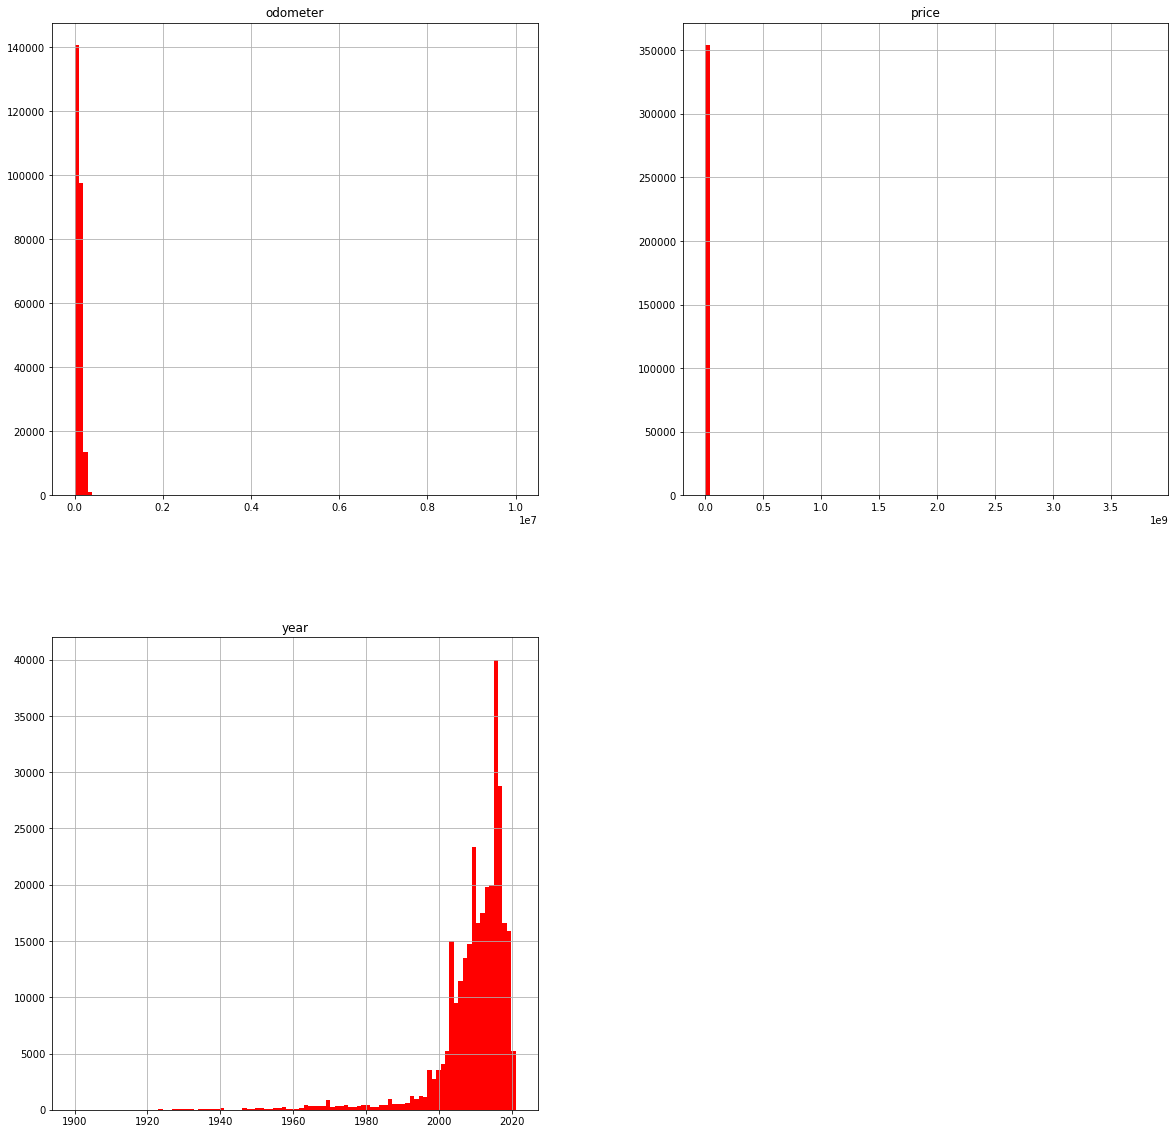

In [14]:
#We check the distribution of some features in our database
database.hist(bins= 100, figsize = (20,20), color = 'r')

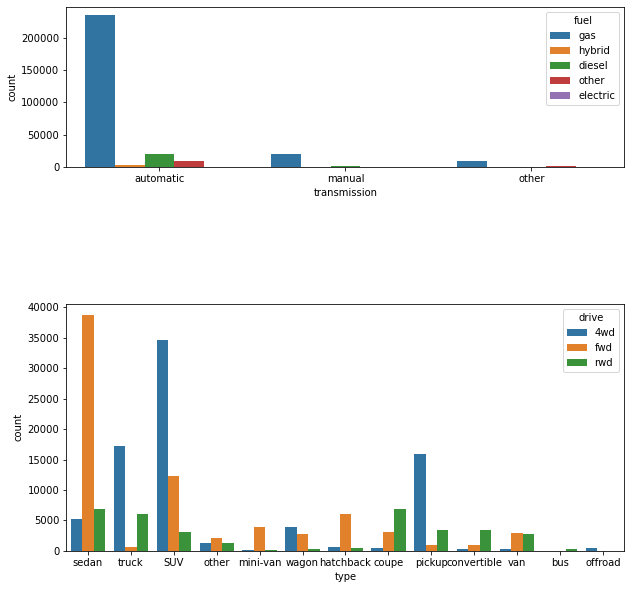

In [15]:
plt.figure(figsize=[10,10])
plt.subplot(311)
sns.countplot(x = 'transmission', hue = 'fuel', data = database)
plt.subplot(212)
sns.countplot(x = 'type', hue = 'drive', data = database)

## Feature Engineering

### Regular Expressions to fill missing values 

In [16]:
#We create a variable with only the features we want
test = database[['manufacturer', 'condition',
       'cylinders', 'fuel', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color']]

In [17]:
#Finally we create a chart to understand better each feature's unique values
chart = pd.DataFrame(columns = ['columns', 'values'])

for i, j in test.items():
    chart = chart.append({'columns': i, 'values': j.unique()}, 
                 ignore_index=True)
#We use these options to show all values in the DataFrame
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
chart

<ipython-input-17-bfd040b68609>:11: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,columns,values
0,manufacturer,"[gmc, hyundai, toyota, mitsubishi, ford, chevrolet, ram, nan, buick, jeep, dodge, subaru, nissan, audi, rover, lexus, honda, chrysler, mini, pontiac, mercedes-benz, cadillac, bmw, kia, volvo, volkswagen, jaguar, acura, saturn, mazda, mercury, lincoln, infiniti, ferrari, fiat, tesla, land rover, harley-davidson, datsun, alfa-romeo, morgan, aston-martin, porche, hennessey]"
1,condition,"[excellent, good, fair, nan, like new, salvage, new]"
2,cylinders,"[8 cylinders, 4 cylinders, 6 cylinders, nan, 10 cylinders, 12 cylinders, 5 cylinders, 3 cylinders, other]"
3,fuel,"[gas, hybrid, diesel, other, electric, nan]"
4,title_status,"[clean, lien, rebuilt, salvage, missing, parts only, nan]"
5,transmission,"[automatic, manual, other, nan]"
6,drive,"[4wd, fwd, rwd, nan]"
7,size,"[nan, mid-size, full-size, compact, sub-compact]"
8,type,"[nan, sedan, truck, SUV, other, mini-van, wagon, hatchback, coupe, pickup, convertible, van, bus, offroad]"
9,paint_color,"[red, grey, blue, white, custom, silver, brown, black, nan, purple, green, orange, yellow]"


In [18]:
pd.reset_option('display.max_rows', None)
pd.reset_option('display.max_columns', None)
pd.reset_option('display.width', None)
pd.reset_option('display.max_colwidth', -1)

In [19]:
#For starters, we will be using the column Description to fill the some missing data on other columns.
#After using Description, we have no more need for this column so we drop it.
import re

manufacturer = '(gmc | hyundai | toyota | mitsubishi | ford | chevrolet | ram | buick | jeep | dodge | subaru | nissan | audi | rover  | lexus \
| honda | chrysler | mini | pontiac | mercedes-benz | cadillac | bmw | kia | volvo | volkswagen | jaguar | acura | saturn | mazda | \
mercury | lincoln | infiniti | ferrari | fiat | tesla | land rover | harley-davidson | datsun | alfa-romeo | morgan | aston-martin | porche \
| hennessey)'
condition = '(excellent | good | fair | like new | salvage | new)'
fuel = '(gas | hybrid | diesel |electric)'
title_status = '(clean | lien | rebuilt | salvage | missing | parts only)'
transmission = '(automatic | manual)'
drive = '(4x4 | awd | fwd | rwd | 4wd)'
size = '(mid-size | full-size | compact | sub-compact)'
type_ = '(sedan | truck | SUV | mini-van | wagon | hatchback | coupe | pickup | convertible | van | bus | offroad)'
paint_color = '(red | grey | blue | white | custom | silver | brown | black | purple | green | orange | yellow)'
cylinders = '(\s[1-9] cylinders? |\s1[0-6]? cylinders?)'

keys =    ['manufacturer', 'condition', 'fuel', 'title_status', 'transmission', 'drive','size', 'type', 'paint_color' , 'cylinders']
columns = [ manufacturer,   condition,   fuel,  title_status, transmission ,drive, size, type_, paint_color,   cylinders]

for i,column in zip(keys,columns):
    database[i] = database[i].fillna(
      database['description'].str.extract(column, flags=re.IGNORECASE, expand=False)).str.lower()

database.drop('description', axis=1, inplace= True)

In [20]:
#And, we check again each unique values for the columns we modified.
test = database[['manufacturer', 'condition',
       'cylinders', 'fuel', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color']]
chart = pd.DataFrame(columns = ['columns', 'values'])

for i, j in test.items():
    chart = chart.append({'columns': i, 'values': j.unique()}, 
                 ignore_index=True)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
chart

<ipython-input-20-d256a4e9844a>:14: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,columns,values
0,manufacturer,"[gmc, hyundai, toyota, mitsubishi, ford, chevrolet, ram, nan, buick, jeep, dodge, subaru, nissan, audi, rover, lexus, honda, ford , chrysler, mini, pontiac, mercedes-benz, cadillac, bmw, ram , kia, volvo, volkswagen, jaguar, acura, saturn, mazda, mercury, dodge , lincoln, infiniti, ferrari, bmw , buick , fiat, jeep , jaguar , hyundai , mazda , mercedes-benz , tesla, chevrolet , honda , nissan , mini , land rover , acura , toyota , chrysler , infiniti , lexus , volkswagen , volvo , subaru , audi , lincoln , gmc , ferrari , morgan , cadillac , land rover, kia , harley-davidson, datsun, alfa-romeo, morgan, aston-martin, pontiac , mitsubishi , fiat , mercury , porche , porche, saturn , tesla , hennessey]"
1,condition,"[excellent, good, fair, new, nan, good , salvage , like new, excellent , salvage, like new , fair , new]"
2,cylinders,"[8 cylinders, 4 cylinders, 6 cylinders, nan, 4 cylinder , 6 cylinder , 10 cylinders, 12 cylinders, 5 cylinders, 6 cylinders , 3 cylinders, 8 cylinder , 3 cylinder , other, 4 cylinders , 8 cylinders , 5 cylinder , 10 cylinder, 5 cylinders , 7 cylinder , 10 cylinders, 4 cylinders , 2 cylinder , 12 cylinder, 3 cylinders , 4 cylinder , 12 cylinders, 8 cylinder , \t8 cylinder , \t4 cylinder ]"
3,fuel,"[gas, hybrid, diesel, other, electric, nan, gas , hybrid , diesel ]"
4,title_status,"[clean, lien, rebuilt, salvage, missing, parts only, nan, clean , rebuilt , salvage , missing ]"
5,transmission,"[automatic, manual, other, nan, manual, automatic ]"
6,drive,"[4wd, fwd, rwd, 4wd, nan, 4x4 , awd , fwd , rwd ]"
7,size,"[nan, mid-size, full-size, compact , compact, sub-compact, full-size , mid-size , sub-compact]"
8,type,"[nan, sedan, truck, suv, other, truck , suv , van , mini-van, wagon, hatchback, coupe, pickup, sedan , convertible, hatchback , van, coupe , wagon , convertible , pickup , offroad, bus, bus , offroad, mini-van ]"
9,paint_color,"[red, grey, blue, white, custom, silver, brown, black, silver , nan, purple, custom , black , blue , grey , red , brown , green, orange, white , yellow, green , yellow, orange , purple ]"


In [21]:
pd.reset_option('display.max_rows', None)
pd.reset_option('display.max_columns', None)
pd.reset_option('display.width', None)
pd.reset_option('display.max_colwidth', -1)

In [22]:
##We need to take care of some things now: 
#Inconsistent data entry. 
columns = ['manufacturer', 'condition',
       'cylinders', 'fuel', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color']
for i in columns: 
    database[i] = database[i].str.strip()

In [23]:
database['cylinders'].unique()

array(['8 cylinders', '4 cylinders', '6 cylinders', nan, '4 cylinder',
       '6 cylinder', '10 cylinders', '12 cylinders', '5 cylinders',
       '3 cylinders', '8 cylinder', '3 cylinder', 'other', '5 cylinder',
       '10 cylinder', '7 cylinder', '2 cylinder', '12 cylinder'],
      dtype=object)

In [24]:
values = {"4 cylinder" : "4 cylinders",
         "6 cylinder" : "6 cylinders",
         "8 cylinder" : "8 cylinders",
         "3 cylinder" : "3 cylinders",
         "5 cylinder" : "5 cylinders",
         "10 cylinder": "10 cylinders",
         "7 cylinder" : "7 cylinders",
         "2 cylinder": '2 cylinders',
         "12 cylinder": "12 cylinders"}
for i,j in values.items():
    database.replace(to_replace=i, value=j, inplace=True)
database['cylinders'].unique()

array(['8 cylinders', '4 cylinders', '6 cylinders', nan, '10 cylinders',
       '12 cylinders', '5 cylinders', '3 cylinders', 'other',
       '7 cylinders', '2 cylinders'], dtype=object)

In [25]:
#We check again NaN values 
missing_values_count = pd.DataFrame({'Null': database.isnull().sum()})
total = len(database)
percentage_null = round((missing_values_count['Null']/total)*100,1)
missing_values_count['Percentage'] = percentage_null
missing_values_count.sort_values(by= 'Null' , ascending = False)

,Null,Percentage
size,241943,68.3
cylinders,160239,45.3
drive,113414,32.0
condition,112516,31.8
odometer,100417,28.4
type,98736,27.9
paint_color,93080,26.3
manufacturer,58969,16.7
model,52469,14.8
fuel,50079,14.1


### Handling Outliers

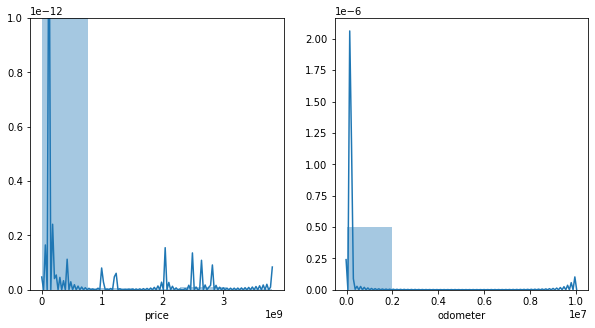

In [26]:
#We are going to handle those outliers of odometer and price we saw before in the description
#First we will visualize them
plt.figure(figsize=[10,5])
plt.subplot(121)
sns.distplot(database['price'], bins = 5)
plt.subplot(122)
sns.distplot(database['odometer'], bins = 5)

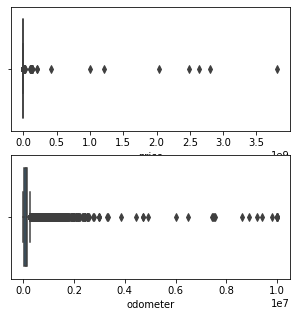

In [27]:
#Another type of visualization to check on the outliers
plt.figure(figsize=[5,5])
plt.subplot(211)
sns.boxplot(x=database['price'])
plt.subplot(212)
sns.boxplot(x=database['odometer'])

In [28]:
#First we will drop the 10% of each side on price
rr=sorted(database["price"])
quantile1, quantile2= np.percentile(rr,[10,90])
print(quantile1,quantile2)

800.0 32254.20000000007


In [29]:
database=database[(database.price <= 32254.20000000007) 
                  & (database.price >= 800.0)]
database.shape

(283728, 16)

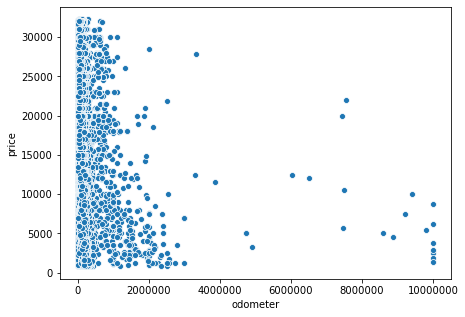

In [30]:
#Now we handle odometer.
#Since there are null values we cannot do what we did with price.
#We use scatterplot to visually check the outliers.
plt.figure(figsize=[7,5])
ax = sns.scatterplot(x = database['odometer'], y= database['price'])
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)

In [31]:
#We will take values up until 3,000,000.
database=database[(database.odometer < 3000000)]

In [32]:
#Also we will be deleting the values equal to 0
database.drop(database[database["odometer"]==0.0].index,inplace=True)

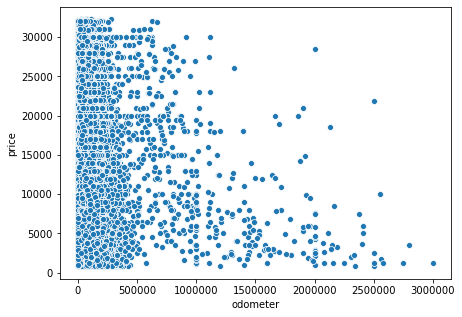

In [33]:
plt.figure(figsize=[7,5])
ax = sns.scatterplot(x = database['odometer'], y= database['price'])
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)

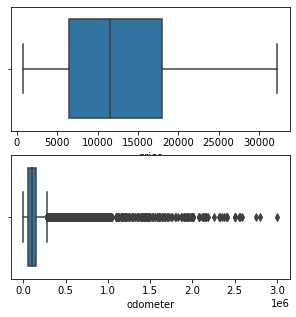

In [34]:
#After handling the outliers
plt.figure(figsize=[5,5])
plt.subplot(211)
sns.boxplot(x=database['price'])
plt.subplot(212)
sns.boxplot(x=database['odometer'])

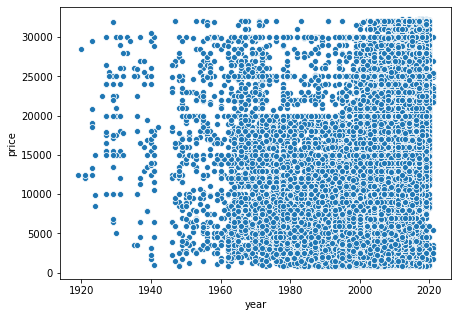

In [35]:
#Finally we deal with the outliers in year. Let's visualize them.
plt.figure(figsize=[7,5])
ax = sns.scatterplot(x = database['year'], y= database['price'])
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)

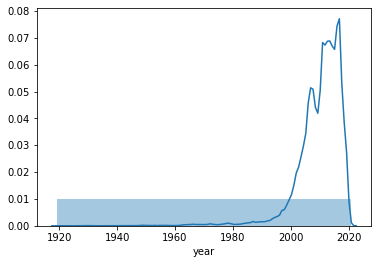

In [36]:
#Another visualization
sns.distplot(database['year'], bins = 1)

In [37]:
#We will be eliminating rows with the year 2021 and those with year <1946
database[database['year'] == 1945].count()

region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64

In [38]:
database=database[(database.year > 1945 )]
database.drop(database[database["year"]==2021].index,inplace=True)

In [39]:
#Let's check NaN values again
missing_values_count = pd.DataFrame({'Null': database.isnull().sum()})
total = len(database)
percentage_null = round((missing_values_count['Null']/total)*100,1)
missing_values_count['Percentage'] = percentage_null
missing_values_count.sort_values(by= 'Null' , ascending = False)

,Null,Percentage
size,120239,59.8
cylinders,59977,29.8
condition,36960,18.4
drive,32772,16.3
type,22911,11.4
paint_color,18997,9.5
manufacturer,4542,2.3
model,1599,0.8
fuel,973,0.5
title_status,832,0.4


### Condition - Status - Odometer

In [40]:
#We will first drop the unusable rows of status and condition
drop = database.loc[database.title_status.isnull() & database.condition.isnull()] #unusable rows
database = database.loc[database.title_status.isnull() & database.condition.notnull() 
                        | database.title_status.notnull() & database.condition.isnull() 
                         | database.title_status.notnull() & database.condition.notnull()] #the dataframe with the usable rows
database.shape

(200483, 16)

In [41]:
# I believe these 3 columns have a relationship so I will use odometer to infer their values
#First we want to create bins to contain the values of the odometer
bins = [0, 30000, 60000, 90000,115000, 150000,10000000]
groups = database.groupby(pd.cut(database.odometer, bins))
groups.title_status.count()

odometer
(0, 30000]            21852
(30000, 60000]        30166
(60000, 90000]        33104
(90000, 115000]       31193
(115000, 150000]      38307
(150000, 10000000]    45537
Name: title_status, dtype: int64

In [42]:
#"title_status" doesn't bring us that much of a value since most values are "clean".
bins = [0, 30000, 60000, 90000,115000, 150000,10000000]
groups = database.groupby(['title_status', pd.cut(database.odometer, bins)])
groups.size().unstack()

odometer,"(0, 30000]","(30000, 60000]","(60000, 90000]","(90000, 115000]","(115000, 150000]","(150000, 10000000]"
title_status,,,,,,
clean,20487,28516,31353,30154,37249,44333
lien,182,267,304,183,186,175
missing,18,21,26,22,22,50
parts only,4,3,7,6,2,19
rebuilt,779,972,993,569,524,515
salvage,382,387,421,259,324,445


In [43]:
#Thus we will add "clean" to the NaN values
database.title_status.fillna("clean", inplace=True)

In [44]:
#Now we compare odometer and condition
#Makes no sense to compare condition and title_status since most of the values are "clean"
bins = [0, 30000, 60000, 90000,115000, 150000,10000000]
groups = database.groupby(['condition', pd.cut(database.odometer, bins)])
groups.size().unstack()

odometer,"(0, 30000]","(30000, 60000]","(60000, 90000]","(90000, 115000]","(115000, 150000]","(150000, 10000000]"
condition,,,,,,
excellent,4772,8277,11237,11293,13310,12473
fair,425,482,532,546,1008,3065
good,6637,8444,9157,8844,11619,17517
like new,2231,2396,2119,1600,1710,1231
new,4065,4867,3912,3103,3248,3326
salvage,83,73,87,75,91,176


In [45]:
#Now we add values to those NaN in "condition" using odometer range of values

m1 = (database['odometer'] > 60000) & (database['odometer'] <= 150000)
m2 = (database['odometer'] <= 60000) | (database['odometer'] > 150000)

database.loc[m1,'condition'] = database.loc[m1,'condition'].fillna('excellent')
database.loc[m2,'condition'] = database.loc[m2,'condition'].fillna("good")

In [46]:
#We combine condition and title_status and then we drop them
database['status'] = database['condition'] + ' & ' + database['title_status']
database.drop(['condition', 'title_status'], axis = 1, inplace=True)
database.head(5)

,region,price,year,manufacturer,model,cylinders,fuel,odometer,transmission,drive,size,type,paint_color,state,status
0,duluth / superior,6995,2000.0,gmc,new sierra 1500,8 cylinders,gas,167783.0,automatic,4wd,NaN,NaN,red,mn,excellent & clean
1,duluth / superior,8750,2013.0,hyundai,sonata,4 cylinders,gas,90821.0,automatic,fwd,NaN,NaN,grey,mn,excellent & clean
2,new haven,10900,2013.0,toyota,prius,4 cylinders,hybrid,92800.0,automatic,fwd,NaN,NaN,blue,ct,good & clean
4,duluth / superior,16995,2007.0,gmc,sierra classic 2500hd,8 cylinders,diesel,254217.0,automatic,4wd,full-size,truck,white,mn,good & clean
5,duluth / superior,13995,2012.0,ford,f-150,6 cylinders,gas,188406.0,automatic,4wd,full-size,truck,grey,mn,good & clean


### Other methods to deal with NaN values

In [47]:
missing_values_count = pd.DataFrame({'Null': database.isnull().sum()})
total = len(database)
percentage_null = round((missing_values_count['Null']/total)*100,1)
missing_values_count['Percentage'] = percentage_null
missing_values_count.sort_values(by= 'Null' , ascending = False)

,Null,Percentage
size,119731,59.7
cylinders,59471,29.7
drive,32742,16.3
type,22838,11.4
paint_color,18796,9.4
manufacturer,4540,2.3
model,1599,0.8
fuel,794,0.4
transmission,589,0.3
region,0,0.0


In [48]:
#First we delete "size" since it has so many NaN values
database.drop('size', axis=1, inplace=True)

In [49]:
#I will be deleting the NaN values < 5%  and "size" since 
database=database.dropna(subset=['transmission', 'fuel', 'model', 'manufacturer'])

In [50]:
#Now we will be using "ffill" for those NaN values between 10% and 30%
columns = ['drive', 'type', 'paint_color']
for i in columns:
    database[i] = database[i].fillna(method='ffill')

<ipython-input-50-01593bc51ae6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  database[i] = database[i].fillna(method='ffill')


In [51]:
#We check again since there must be left some NaN values
missing_values_count = pd.DataFrame({'Null': database.isnull().sum()})
total = len(database)
percentage_null = round((missing_values_count['Null']/total)*100,1)
missing_values_count['Percentage'] = percentage_null
missing_values_count.sort_values(by= 'Null' , ascending = False)

,Null,Percentage
cylinders,56914,29.5
type,3,0.0
region,0,0.0
price,0,0.0
year,0,0.0
manufacturer,0,0.0
model,0,0.0
fuel,0,0.0
odometer,0,0.0
transmission,0,0.0


In [52]:
#We delete that subset of NaN values
database=database.dropna(subset=['type'])

In [53]:
#Finally instead of doing the ffill we will use drive to guess cylinders' NaN values
database.groupby(['drive', 'cylinders']).cylinders.count()

drive  cylinders   
4wd    10 cylinders      254
       12 cylinders        4
       2 cylinders         1
       3 cylinders        48
       4 cylinders     14303
       5 cylinders       309
       6 cylinders     20458
       8 cylinders     17239
       other              73
4x4    10 cylinders        4
       3 cylinders         1
       4 cylinders       138
       5 cylinders         3
       6 cylinders       198
       8 cylinders       128
awd    10 cylinders        1
       3 cylinders         1
       4 cylinders       964
       5 cylinders        14
       6 cylinders      1012
       8 cylinders       215
       other               4
fwd    10 cylinders       30
       12 cylinders        8
       3 cylinders       206
       4 cylinders     35698
       5 cylinders       746
       6 cylinders     17217
       8 cylinders      1872
       other             171
rwd    10 cylinders      259
       12 cylinders       56
       2 cylinders         6
       3 cylinders     

In [54]:
#We add a value to the Nan values of cylinders using drive 
values = {'4wd': '6 cylinders',
              '4x4': '6 cylinders',
              'awd': '6 cylinders',
              'fwd': '4 cylinders',
              'rwd': '8 cylinders'}

database.loc[database["cylinders"].isna(), 'cylinders'] = database.loc[
    database["cylinders"].isna(), 'drive'].map(lambda x: values[x])

### Region - State

In [55]:
#Since they are deeply connected we will join these 2 columns
#We combine condition and title_status and then we drop them
database['region'] = database['region'] + ' (' + database['state'] + ')'
database.drop(['state'], axis = 1, inplace=True)
database.head(5)

,region,price,year,manufacturer,model,cylinders,fuel,odometer,transmission,drive,type,paint_color,status
4,duluth / superior (mn),16995,2007.0,gmc,sierra classic 2500hd,8 cylinders,diesel,254217.0,automatic,4wd,truck,white,good & clean
5,duluth / superior (mn),13995,2012.0,ford,f-150,6 cylinders,gas,188406.0,automatic,4wd,truck,grey,good & clean
6,duluth / superior (mn),7995,2010.0,chevrolet,equinox,4 cylinders,gas,108124.0,automatic,4wd,suv,grey,good & clean
7,duluth / superior (mn),8995,2011.0,chevrolet,traverse,6 cylinders,gas,178054.0,automatic,4wd,suv,white,good & clean
8,duluth / superior (mn),10995,2014.0,ford,explorer,6 cylinders,gas,170259.0,automatic,4wd,suv,white,good & clean


## Categorical Variable Encoding

In [56]:
database.shape

(193060, 13)

In [57]:
database.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193060 entries, 4 to 423856
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        193060 non-null  object 
 1   price         193060 non-null  int64  
 2   year          193060 non-null  float64
 3   manufacturer  193060 non-null  object 
 4   model         193060 non-null  object 
 5   cylinders     193060 non-null  object 
 6   fuel          193060 non-null  object 
 7   odometer      193060 non-null  float64
 8   transmission  193060 non-null  object 
 9   drive         193060 non-null  object 
 10  type          193060 non-null  object 
 11  paint_color   193060 non-null  object 
 12  status        193060 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 20.6+ MB


In [58]:
#We have 13 columns. Out of those, 10 columns are categorical. 
# Apply the Label encoder to each categorical feature 
from sklearn.preprocessing import LabelEncoder 
cat_features = ['region', 'manufacturer', 'model', 'cylinders', 'fuel', 'transmission', 
                'drive', 'type', 'paint_color', 'status'] 
encoder = LabelEncoder() 
encoded = database[cat_features].apply(encoder.fit_transform)
database.drop(cat_features, axis=1, inplace=True)
database = pd.concat([encoded,database],axis = 1) 
database.head(1)

,region,manufacturer,model,cylinders,fuel,transmission,drive,type,paint_color,status,price,year,odometer
4,88,14,13022,7,0,0,0,10,10,12,16995,2007.0,254217.0


## Correlations

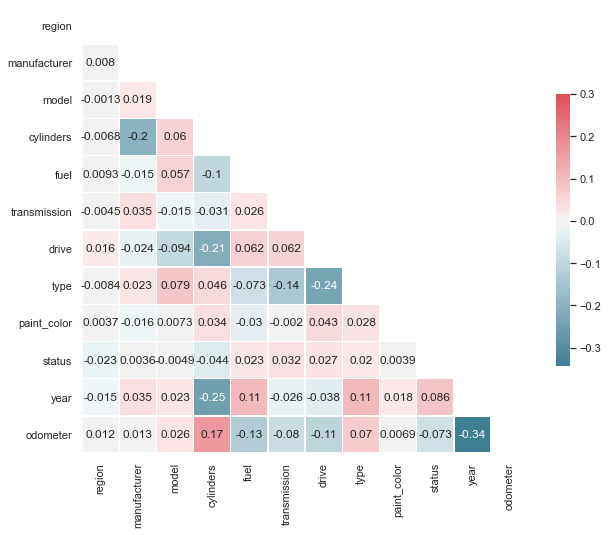

In [59]:
#We check high correlated features with the Correlation Matrix
#If there are none, we leave the database as it is
sns.set(style="white")
corr = database.drop(columns = ['price']).corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, 
            cbar_kws={"shrink": .5}, annot = True)

## Splitting into Train and Test Set 

In [60]:
database.columns

Index(['region', 'manufacturer', 'model', 'cylinders', 'fuel', 'transmission',
       'drive', 'type', 'paint_color', 'status', 'price', 'year', 'odometer'],
      dtype='object')

In [61]:
#First, we change the order of the features and we put the depedent variable at the end
column_names = ['region', 'manufacturer', 'model', 'cylinders', 'fuel', 'transmission',
       'drive', 'type', 'paint_color', 'status', 'year',
       'odometer' , 'price']

database = database.reindex(columns = column_names ) 
database.head(1)

,region,manufacturer,model,cylinders,fuel,transmission,drive,type,paint_color,status,year,odometer,price
4,88,14,13022,7,0,0,0,10,10,12,2007.0,254217.0,16995


In [62]:
#We split into Training and Test Set

X = database.iloc[:,:-1]  #independent columns
y = database.iloc[:,-1]    #target column i.e price range

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Scaling

In [63]:
#Now we do some Feature Scaling
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test)) #we do the Feature Scaling

X_train2.columns = X_train.columns.values 
X_test2.columns = X_test.columns.values #we give the new Scaled DataFrame column names

X_train2.index = X_train.index.values
X_test2.index = X_test.index.values #we give the new Scaled DataFrame each index

X_train = X_train2
X_test = X_test2

X_train.head(1)

,region,manufacturer,model,cylinders,fuel,transmission,drive,type,paint_color,status,year,odometer
232399,-1.35073,-0.512069,-0.437021,0.535703,0.045659,-0.311257,-1.236546,0.478498,-0.44515,-1.071774,0.359612,0.986555


## Modelling

### Random Forest

In [64]:
#We chose Random Forest algorith for this project
#Let's do Cross Validation to check the overal score in the Training Set
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

scores = []
forest = RandomForestRegressor(n_estimators=20, random_state=0)
acc = cross_val_score(forest, X_train, y_train, scoring='r2', cv=5)
scores.append(round(acc.mean()*100,2))

In [65]:
results = pd.DataFrame({
    'Metrics': ['R2'],
    'Accuracy': scores})
results

,Metrics,Accuracy
0,R2,85.48


### Hyper-parameter tuning

In [66]:
#To improve the performance of the model, we optimise hyper-parameters
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 200, 300]}
forest = RandomForestRegressor(random_state=0)
grid_search = GridSearchCV(estimator = forest, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [67]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:  8.1min remaining:  2.3min
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed: 10.4min finished


{'n_estimators': 300}

In [68]:
scores2 = []
best_grid = grid_search.best_estimator_
acc2 = cross_val_score(best_grid, X_train, y_train, scoring='r2', cv=5)
scores2.append(round(acc2.mean()*100,2))

In [69]:
results = pd.DataFrame({
    'Metrics': ['R2'],
    'Accuracy': scores,
    'Accuracy Tuned Param': scores2})
results

,Metrics,Accuracy,Accuracy Tuned Param
0,R2,85.48,86.34


### Validation

In [70]:
#Finally let's check the performance on the Test Set
from sklearn.metrics import r2_score

best_grid = grid_search.best_estimator_
y_pred = best_grid.predict(X_test)
acc_test = round(r2_score(y_test,y_pred)*100,2)

In [71]:
results = pd.DataFrame({
    'Metrics': ['R2'],
    'Accuracy': scores,
    'Accuracy Tuned Param': scores2,
    'Accuracy Test Set': acc_test})
results

,Metrics,Accuracy,Accuracy Tuned Param,Accuracy Test Set
0,R2,85.48,86.34,87.03


In [72]:
#Other metrics apart from R2 
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE

print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))

Mean Absolute Error: 1746.9
Mean Squared Error: 7721380.42
Root Mean Squared Error: 2778.74


### Feature importance

In [73]:
#On to the second goal: feature importance when predicting prices
name = []
importance = []
for nam, imp in zip(X, best_grid.feature_importances_):
    name.append(nam)
    importance.append(round(imp*100,2))

In [74]:
features = pd.DataFrame({'Features': name, "Importance (%)": importance})
features.sort_values(by='Importance (%)', ascending = False)

,Features,Importance (%)
10,year,42.49
11,odometer,14.66
3,cylinders,10.54
2,model,9.17
4,fuel,4.96
1,manufacturer,4.72
7,type,3.47
6,drive,3.25
0,region,2.54
9,status,1.99


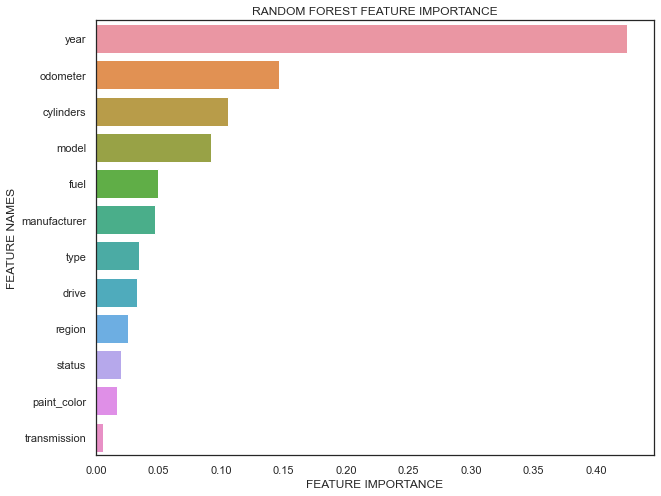

In [75]:
#Finally we plot it 
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')


plot_feature_importance(best_grid.feature_importances_,X.columns,'RANDOM FOREST')

#### More information on this project on: https://medium.com/@jgarciaportillo/end-to-end-data-science-project-predicting-used-car-prices-using-regression-1b12386c69c8